In [50]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [6]:
type(data)

dict

In [8]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975054e+07,1.975054e+07,False,NaN,1,NaN,NaN,None,2024-09-06T18:15:00.000Z,53823.387526,4.235803e+10,41.5904,-0.761721,-4.775714,-8.407533,-2.647129,-4.444979,-22.518436,1.063041e+12,55.9174,1.130291e+12,None,2024-09-06T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:16:40.196335
1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203172e+08,1.203172e+08,True,NaN,2,NaN,NaN,None,2024-09-06T18:14:00.000Z,2243.539285,2.044132e+10,57.1396,-0.976747,-6.137297,-9.370563,-5.082186,-24.730685,-39.243538,2.699363e+11,14.1989,2.699363e+11,None,2024-09-06T18:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:16:40.196335
2,825,Tether USDt,USDT,tether,96550,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181363e+11,1.202409e+11,True,NaN,3,NaN,NaN,None,2024-09-06T18:14:00.000Z,0.999382,6.407558e+10,39.6284,0.014216,-0.036799,-0.041510,-0.067068,-0.046059,-0.050660,1.180632e+11,6.2102,1.201665e+11,None,2024-09-06T18:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 15:16:40.196335
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459346e+08,1.459346e+08,False,NaN,4,NaN,NaN,None,2024-09-06T18:14:00.000Z,487.060642,1.675182e+09,13.7118,-0.424139,-2.993797,-8.124849,2.572137,-3.568614,-29.066901,7.107900e+10,3.7388,7.107900e+10,None,2024-09-06T18:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:16:40.196335
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.669663e+08,5.839838e+08,True,NaN,5,NaN,NaN,None,2024-09-06T18:14:00.000Z,126.275420,2.667554e+09,46.7700,-0.461623,-3.074618,-6.363374,-13.139211,-7.673961,-21.501369,5.896636e+10,3.1017,7.374280e+10,None,2024-09-06T18:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:16:40.196335
5,3408,USDC,USDC,usd-coin,21863,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.481929e+10,3.481929e+10,False,NaN,6,NaN,NaN,None,2024-09-06T18:14:00.000Z,1.000067,8.621292e+09,56.9718,0.016757,0.018415,0.020492,0.023427,0.000985,0.005123,3.482164e+10,1.8316,3.482164e+10,None,2024-09-06T18:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 15:16:40.196335
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-06T18:15:00.000Z,0.520041,1.264081e+09,43.5685,0.077766,-4.718530,-6.652774,3.379386,21.413778,5.066475,2.925309e+10,1.5385,5.200405e+10,None,2024-09-06T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:16:40.196335
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458469e+11,1.458469e+11,True,NaN,8,NaN,NaN,None,2024-09-06T18:15:00.000Z,0.091817,6.636150e+08,51.0980,-0.254120,-7.264069,-7.544282,-5.545927,-13.937266,-37.467220,1.339124e+10,0.7043,1.339124e+10,None,2024-09-06T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:16:40.196335
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.67354

In [12]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

if not os.path.isfile(r'C:\Users\maxid\OneDrive\Documentos\Portafolio\Proyect 5\API.csv'):
    df.to_csv(r'C:\Users\maxid\OneDrive\Documentos\Portafolio\Proyect 5\API.csv', header='column_names')
else:
    df.to_csv(r'C:\Users\maxid\OneDrive\Documentos\Portafolio\Proyect 5\API.csv', mode='a', header=False)

In [ ]:
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(21600) #sleep for 6 hours
exit()

API Runner completed


In [14]:
df = pd.read_csv(r'C:\Users\maxid\OneDrive\Documentos\Portafolio\Proyect 5\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975052e+07,1.975052e+07,False,NaN,1,NaN,NaN,NaN,2024-09-06T17:55:00.000Z,53913.658431,4.206172e+10,40.5981,-0.094030,-4.633802,-8.249253,-3.114612,-4.067846,-22.335861,1.064823e+12,56.0291,1.132187e+12,NaN,2024-09-06T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
1,1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203172e+08,1.203172e+08,True,NaN,2,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,2238.567018,2.022391e+10,55.2343,-0.993217,-6.315032,-9.172716,-5.816131,-24.957857,-39.238547,2.693381e+11,14.1559,2.693381e+11,NaN,2024-09-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
2,2,825,Tether USDt,USDT,tether,96550,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.181363e+11,1.202409e+11,True,NaN,3,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,0.999428,6.359396e+10,38.4428,-0.004403,-0.032055,-0.030256,-0.087344,-0.031971,-0.047162,1.180687e+11,6.2055,1.201721e+11,NaN,2024-09-06T17:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 14:55:59.377252
3,3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459346e+08,1.459346e+08,False,NaN,4,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,486.611806,1.672089e+09,13.4928,-0.137628,-3.082543,-8.091565,1.869781,-3.500823,-28.821355,7.101350e+10,3.7366,7.101350e+10,NaN,2024-09-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
4,4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.669664e+08,5.839839e+08,True,NaN,5,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,126.361147,2.677973e+09,48.1620,0.350171,-3.173789,-5.822199,-14.082272,-7.838827,-21.070671,5.900641e+10,3.1013,7.379287e+10,NaN,2024-09-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
5,5,3408,USDC,USDC,usd-coin,21863,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.481996e+10,3.481996e+10,False,NaN,6,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,0.999994,8.556709e+09,56.1381,-0.005311,-0.002519,0.018483,-0.006154,0.002742,-0.007812,3.481974e+10,1.8301,3.481974e+10,NaN,2024-09-06T17:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 14:55:59.377252
6,6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,NaN,2024-09-06T17:55:00.000Z,0.520536,1.260669e+09,43.1696,0.312815,-4.591839,-6.498914,3.460574,21.911202,5.597029,2.928097e+10,1.5394,5.205361e+10,NaN,2024-09-06T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
7,7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.458466e+11,1.458466e+11,True,NaN,8,NaN,NaN,NaN,2024-09-06T17:55:00.000Z,0.091760,6.650918e+08,52.5856,-0.100972,-6.972684,-7.589959,-5.540359,-13.993194,-36.947896,1.338284e+10,0.7036,1.338284e+10,NaN,2024-09-06T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
8,8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'laye

In [16]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19750518.00000,19750518.00000,False,NaN,1,NaN,NaN,NaN,2024-09-06T17:55:00.000Z,53913.65843,42061717476.82459,40.59810,-0.09403,-4.63380,-8.24925,-3.11461,-4.06785,-22.33586,1064822681282.11279,56.02910,1132186827045.46997,NaN,2024-09-06T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
1,1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317181.32366,120317181.32366,True,NaN,2,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,2238.56702,20223914478.47839,55.23430,-0.99322,-6.31503,-9.17272,-5.81613,-24.95786,-39.23855,269338073788.68088,14.15590,269338073788.67999,NaN,2024-09-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
2,2,825,Tether USDt,USDT,tether,96550,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,118136286822.52271,120240893180.00957,True,NaN,3,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,0.99943,63593955753.77871,38.44280,-0.00440,-0.03206,-0.03026,-0.08734,-0.03197,-0.04716,118068690760.43222,6.20550,120172092889.25999,NaN,2024-09-06T17:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 14:55:59.377252
3,3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145934591.82754,145934591.82754,False,NaN,4,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,486.61181,1672089061.47344,13.49280,-0.13763,-3.08254,-8.09156,1.86978,-3.50082,-28.82136,71013495342.00108,3.73660,71013495342.00000,NaN,2024-09-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
4,4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466966367.86986,583983878.22301,True,NaN,5,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,126.36115,2677973307.11697,48.16200,0.35017,-3.17379,-5.82220,-14.08227,-7.83883,-21.07067,59006405792.95697,3.10130,73792872604.85001,NaN,2024-09-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
5,5,3408,USDC,USDC,usd-coin,21863,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34819963073.76582,34819963073.76582,False,NaN,6,NaN,NaN,NaN,2024-09-06T17:54:00.000Z,0.99999,8556708787.05588,56.13810,-0.00531,-0.00252,0.01848,-0.00615,0.00274,-0.00781,34819742581.07567,1.83010,34819742581.08000,NaN,2024-09-06T17:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 14:55:59.377252
6,6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56251561168.00000,99987294444.00000,False,NaN,7,NaN,NaN,NaN,2024-09-06T17:55:00.000Z,0.52054,1260668794.56984,43.16960,0.31281,-4.59184,-6.49891,3.46057,21.91120,5.59703,29280966147.51238,1.53940,52053606228.03000,NaN,2024-09-06T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 14:55:59.377252
7,7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,145846636383.70526,145846636383.70526,True,NaN,8,NaN,NaN,NaN,2024-09-06T17:55:00.000Z,0.09176,665091801.23528,52.58560,-0.10097,-6.97268,-7.58996,-5.54036,-13.99319,-36.94790,13382837034.15222,0.70360,13382837034.15000,NaN,2024-09

In [18]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.42788,-4.70476,-8.32839,-2.88087,-4.25641,-22.42715
Ethereum,-0.98498,-6.22616,-9.27164,-5.44916,-24.84427,-39.24104
Tether USDt,0.00491,-0.03443,-0.03588,-0.07721,-0.03901,-0.04891
BNB,-0.28088,-3.03817,-8.10821,2.22096,-3.53472,-28.94413
Solana,-0.05573,-3.12420,-6.09279,-13.61074,-7.75639,-21.28602
USDC,0.00572,0.00795,0.01949,0.00864,0.00186,-0.00134
XRP,0.19529,-4.65518,-6.57584,3.41998,21.66249,5.33175
Dogecoin,-0.17755,-7.11838,-7.56712,-5.54314,-13.96523,-37.20756
TRON,0.02809,-1.49294,-7.38619,18.91725,18.04410,29.30826


In [20]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.42788
              quote.USD.percent_change_24h    -4.70476
              quote.USD.percent_change_7d     -8.32839
              quote.USD.percent_change_30d    -2.88087
              quote.USD.percent_change_60d    -4.25641
              quote.USD.percent_change_90d   -22.42715
Ethereum      quote.USD.percent_change_1h     -0.98498
              quote.USD.percent_change_24h    -6.22616
              quote.USD.percent_change_7d     -9.27164
              quote.USD.percent_change_30d    -5.44916
              quote.USD.percent_change_60d   -24.84427
              quote.USD.percent_change_90d   -39.24104
Tether USDt   quote.USD.percent_change_1h      0.00491
              quote.USD.percent_change_24h    -0.03443
              quote.USD.percent_change_7d     -0.03588
              quote.USD.percent_change_30d    -0.07721
              quote.USD.percent_change_60d    -0.03901
              quote.US

In [22]:
type(df4)

pandas.core.series.Series

In [24]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.42788
             quote.USD.percent_change_24h  -4.70476
             quote.USD.percent_change_7d   -8.32839
             quote.USD.percent_change_30d  -2.88087
             quote.USD.percent_change_60d  -4.25641
             quote.USD.percent_change_90d -22.42715
Ethereum     quote.USD.percent_change_1h   -0.98498
             quote.USD.percent_change_24h  -6.22616
             quote.USD.percent_change_7d   -9.27164
             quote.USD.percent_change_30d  -5.44916
             quote.USD.percent_change_60d -24.84427
             quote.USD.percent_change_90d -39.24104
Tether USDt  quote.USD.percent_change_1h    0.00491
             quote.USD.percent_change_24h  -0.03443
             quote.USD.percent_change_7d   -0.03588
             quote.USD.percent_change_30d  -0.07721
             quote.USD.percent_change_60d  -0.03901
             quote.USD.percent_change_90d  -0.04891
BNB          quote.USD.percent_change_1h   -0.28088
             quote.USD.percent_change_24h  -3.03817
             quote.USD.percent_change_7d   -8.10821
             quote.USD.percent_change_30d   2.22096
             quote.USD.percent_change_60d  -3.53472
             quote.USD.percent_change_90d -28.94413
Solana       quote.USD.percent_change_1h   -0.05573
             quote.USD.percent_change_24h  -3.12420
             quote.USD.percent_change_7d   -6.09279
             quote.USD.percent_change_30d -13.61074
             quote.USD.percent_change_60d  -7.75639
             quote.USD.percent_change_90d -21.28602
USDC         quote.USD.percent_change_1h    0.00572
             quote.USD.percent_change_24h   0.00795
             quote.USD.percent_change_7d    0.01949
             quote.USD.percent_change_30d   0.00864
             quote.USD.percent_change_60d   0.00186
             quote.USD.percent_change_90d  -0.00134
XRP          quote.USD.percent_change_1h    0.19529
             quote.USD.percent_change_24h  -4.65518
             quote.USD.percent_change_7d   -6.57584
             quote.USD.percent_change_30d   3.41998
             quote.USD.percent_change_60d  21.66249
             quote.USD.percent_change_90d   5.33175
Dogecoin     quote.USD.percent_change_1h   -0.17755
             quote.USD.percent_change_24h  -7.11838
             quote.USD.percent_change_7d   -7.56712
             quote.USD.percent_change_30d  -5.54314
             quote.USD.percent_change_60d -13.96523
             quote.USD.percent_change_90d -37.20756
TRON         quote.USD.percent_change_1h    0.02809
             quote.USD.percent_change_24h  -1.49294
             quote.USD.percent_change_7d   -7.38619
             quote.USD.percent_change_30d  18.91725
             quote.USD.percent_change_60d  18.04410
             quote.USD.percent_change_90d  29.30826
Toncoin      quote.USD.percent_change_1h   -0.32471
             quote.USD.percent_change_24h   1.18536
             quote.USD.percent_change_7d  -10.73617
             quote.USD.percent_change_30d -12.56890
             quote.USD.percent_change_60d -34.05568
             quote.USD.percent_change_90d -33.59989
Cardano      quote.USD.percent_change_1h    0.02482
             quote.USD.percent_change_24h  -3.76837
             quote.USD.percent_change_7d   -8.11869
             quote.USD.percent_change_30d  -2.21045
             quote.USD.percent_change_60d -13.48243
             quote.USD.percent_change_90d -27.71271
Avalanche    quote.USD.percent_change_1h    0.41142
             quote.USD.percent_change_24h  -2.66462
             quote.USD.percent_change_7d   -7.20666
             quote.USD.percent_change_30d   4.08874
             quote.USD.percent_change_60d -18.38843
             quote.USD.percent_change_90d -35.11332
Shiba Inu    quote.USD.percent_change_1h   -0.42362
             quote.USD.percent_change_24h  -3.58458
             quote.USD.percent_change_7d   -7.47762
             quote.USD.percent_change_30d

In [38]:
df5.count()

values    90
dtype: int64

In [58]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.42788
1,Bitcoin,quote.USD.percent_change_24h,-4.70476
2,Bitcoin,quote.USD.percent_change_7d,-8.32839
3,Bitcoin,quote.USD.percent_change_30d,-2.88087
4,Bitcoin,quote.USD.percent_change_60d,-4.25641
5,Bitcoin,quote.USD.percent_change_90d,-22.42715
6,Ethereum,quote.USD.percent_change_1h,-0.98498
7,Ethereum,quote.USD.percent_change_24h,-6.22616
8,Ethereum,quote.USD.percent_change_7d,-9.27164
9,Ethereum,quote.USD.percent_change_30d,-5.44916


In [62]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.42788
1,Bitcoin,quote.USD.percent_change_24h,-4.70476
2,Bitcoin,quote.USD.percent_change_7d,-8.32839
3,Bitcoin,quote.USD.percent_change_30d,-2.88087
4,Bitcoin,quote.USD.percent_change_60d,-4.25641
5,Bitcoin,quote.USD.percent_change_90d,-22.42715
6,Ethereum,quote.USD.percent_change_1h,-0.98498
7,Ethereum,quote.USD.percent_change_24h,-6.22616
8,Ethereum,quote.USD.percent_change_7d,-9.27164
9,Ethereum,quote.USD.percent_change_30d,-5.44916


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.42788
1,Bitcoin,24h,-4.70476
2,Bitcoin,7d,-8.32839
3,Bitcoin,30d,-2.88087
4,Bitcoin,60d,-4.25641
5,Bitcoin,90d,-22.42715
6,Ethereum,quote.USD.percent_change_1h,-0.98498
7,Ethereum,24h,-6.22616
8,Ethereum,7d,-9.27164
9,Ethereum,30d,-5.44916


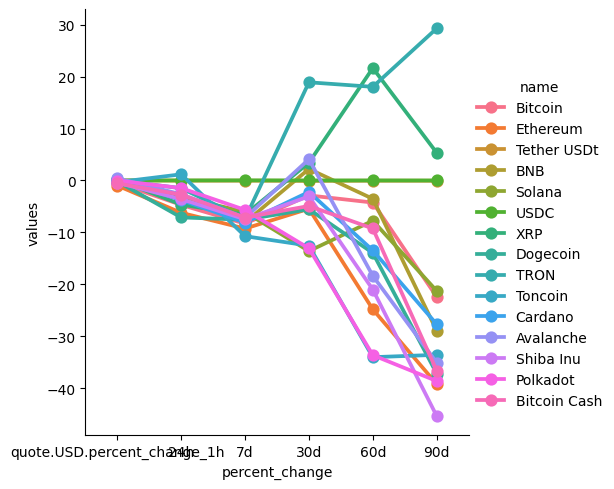

In [66]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [68]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,53913.65843,2024-09-06 14:55:59.377252
15,Bitcoin,53823.38753,2024-09-06 15:16:40.196335


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

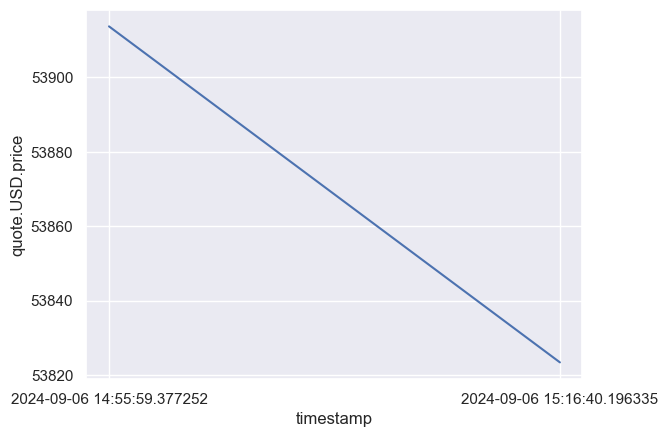

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)